In [1]:
# package(s) related to time, space and id
import datetime, time
import os
import io
import functools
import logging
import pickle
import random
import math

# package(s) related to the simulation
import simpy
import networkx as nx  
import numpy as np
import pandas as pd
import yaml as yaml
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# OpenTNSim
from opentnsim import core
from opentnsim import plot
from opentnsim import model

# spatial libraries 
import shapely.geometry
import shapely.wkt
import pyproj
import shapely.geometry
import folium

# package(s) for data handling
import requests

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger()

# define the coorinate system
geod = pyproj.Geod(ellps="WGS84")

location_vessel_database = "Vessels/richtlijnen-vaarwegen-2017.csv"

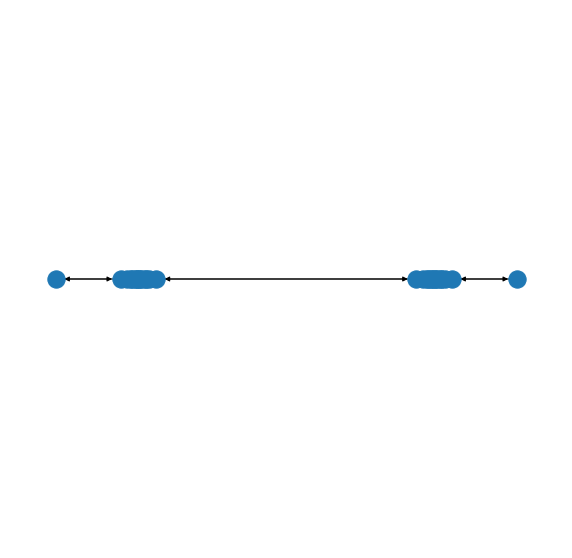

In [2]:
Node = type('Site', (core.Identifiable, core.Log, core.Locatable, core.HasResource), {})
nodes = []
path = []
coords = []

coords.append([0.00,0.00])                                                                                           #Node 1
coords.append([geod.fwd(coords[0][0],coords[0][1],90,5000)[0],   geod.fwd(coords[0][0],coords[0][1],90,5000)[1]])    #Node 2
coords.append([geod.fwd(coords[1][0],coords[1][1],90,500)[0],    geod.fwd(coords[1][0],coords[1][1],90,500)[1]])     #Node 3
coords.append([geod.fwd(coords[2][0],coords[2][1],90,300)[0],    geod.fwd(coords[2][0],coords[2][1],90,300)[1]])     #Node 4
coords.append([geod.fwd(coords[3][0],coords[3][1],90,50)[0],     geod.fwd(coords[3][0],coords[3][1],90,50)[1]])      #Node 5
coords.append([geod.fwd(coords[4][0],coords[4][1],90,300)[0],    geod.fwd(coords[4][0],coords[4][1],90,300)[1]])     #Node 6
coords.append([geod.fwd(coords[5][0],coords[5][1],90,50)[0],     geod.fwd(coords[5][0],coords[5][1],90,50)[1]])      #Node 7
coords.append([geod.fwd(coords[6][0],coords[6][1],90,150)[0],    geod.fwd(coords[6][0],coords[6][1],90,150)[1]])     #Node 8
coords.append([geod.fwd(coords[7][0],coords[7][1],90,150)[0],    geod.fwd(coords[7][0],coords[7][1],90,150)[1]])     #Node 9
coords.append([geod.fwd(coords[8][0],coords[8][1],90,50)[0],     geod.fwd(coords[8][0],coords[8][1],90,50)[1]])      #Node 10
coords.append([geod.fwd(coords[9][0],coords[9][1],90,300)[0],    geod.fwd(coords[9][0],coords[9][1],90,300)[1]])     #Node 11
coords.append([geod.fwd(coords[10][0],coords[10][1],90,50)[0],   geod.fwd(coords[10][0],coords[10][1],90,50)[1]])    #Node 12
coords.append([geod.fwd(coords[11][0],coords[11][1],90,300)[0],  geod.fwd(coords[11][0],coords[11][1],90,300)[1]])   #Node 13
coords.append([geod.fwd(coords[12][0],coords[12][1],90,500)[0],  geod.fwd(coords[12][0],coords[12][1],90,500)[1]])   #Node 14
coords.append([geod.fwd(coords[13][0],coords[13][1],90,20000)[0],geod.fwd(coords[13][0],coords[13][1],90,20000)[1]]) #Node 15
coords.append([geod.fwd(coords[14][0],coords[14][1],90,500)[0],  geod.fwd(coords[14][0],coords[14][1],90,500)[1]])   #Node 16
coords.append([geod.fwd(coords[15][0],coords[15][1],90,300)[0],  geod.fwd(coords[15][0],coords[15][1],90,300)[1]])   #Node 17
coords.append([geod.fwd(coords[16][0],coords[16][1],90,50)[0],   geod.fwd(coords[16][0],coords[16][1],90,50)[1]])    #Node 18
coords.append([geod.fwd(coords[17][0],coords[17][1],90,300)[0],  geod.fwd(coords[17][0],coords[17][1],90,300)[1]])   #Node 19
coords.append([geod.fwd(coords[18][0],coords[18][1],90,50)[0],   geod.fwd(coords[18][0],coords[18][1],90,50)[1]])    #Node 20
coords.append([geod.fwd(coords[19][0],coords[19][1],90,150)[0],  geod.fwd(coords[19][0],coords[19][1],90,150)[1]])   #Node 21
coords.append([geod.fwd(coords[20][0],coords[20][1],90,150)[0],  geod.fwd(coords[20][0],coords[20][1],90,150)[1]])   #Node 22
coords.append([geod.fwd(coords[21][0],coords[21][1],90,50)[0],   geod.fwd(coords[21][0],coords[21][1],90,50)[1]])    #Node 23
coords.append([geod.fwd(coords[22][0],coords[22][1],90,300)[0],  geod.fwd(coords[22][0],coords[22][1],90,300)[1]])   #Node 24
coords.append([geod.fwd(coords[23][0],coords[23][1],90,50)[0],   geod.fwd(coords[23][0],coords[23][1],90,50)[1]])    #Node 25
coords.append([geod.fwd(coords[24][0],coords[24][1],90,300)[0],  geod.fwd(coords[24][0],coords[24][1],90,300)[1]])   #Node 26
coords.append([geod.fwd(coords[25][0],coords[25][1],90,500)[0],  geod.fwd(coords[25][0],coords[25][1],90,500)[1]])   #Node 27
coords.append([geod.fwd(coords[26][0],coords[26][1],90,5000)[0], geod.fwd(coords[26][0],coords[26][1],90,5000)[1]])  #Node 28

for d in range(len(coords)):
    data_node = {"env": [],
                 "name": "Node " + str(d+1),
                 "geometry": shapely.geometry.Point(coords[d][0], coords[d][1])}
    node = Node(**data_node)
    nodes.append(node)

for i in range(len(coords)-1):
    path.append([nodes[i],nodes[i+1]]) 
    path.append([nodes[i+1],nodes[i]])

FG = nx.DiGraph()

positions = {}
for node in nodes:
    positions[node.name] = (node.geometry.x, node.geometry.y)
    FG.add_node(node.name, geometry = node.geometry)

for edge in path:
    FG.add_edge(edge[0].name, edge[1].name, weight = 1)

fig, ax = plt.subplots(figsize=(10, 10))
nx.draw(FG, positions)
plt.axis('equal')
plt.show()

In [3]:
vessel_db = pd.read_csv(location_vessel_database)
vessel_db.columns = ['vessel_id','type','B','L','H_e','H_f','T_e','T_f','C','P']
vessel_db.head()

,vessel_id,type,B,L,H_e,H_f,T_e,T_f,C,P
0,12ad8a02-4aef-11e9-9940-b469212bff5b,CEMT - I,5.05,38.5,4.65,3.35,1.2,2.5,365,175
1,17746aee-4aef-11e9-8ebf-b469212bff5b,CEMT - II,6.60,55.0,5.80,4.60,1.4,2.6,615,250
2,1be5fb2e-4aef-11e9-9bfb-b469212bff5b,CEMT - III,8.20,85.0,6.30,5.10,1.5,2.7,1250,435
3,208a5aca-4aef-11e9-b7e9-b469212bff5b,CEMT - IV,9.50,105.0,6.70,5.30,1.6,3.0,2040,690
4,24f93100-4aef-11e9-8ff9-b469212bff5b,CEMT - Va,11.40,135.0,7.10,5.40,1.8,3.5,3735,1425


In [4]:
# Start simpy environment (at a given date and time)
simulation_start = datetime.datetime.now()
sim = model.Simulation(simulation_start,FG)
env = sim.environment

In [5]:
Vessel = type('Vessel', 
              (core.Identifiable, core.Movable, core.Routeable, core.VesselProperties), {})

generator = model.VesselGenerator(Vessel,vessel_db.drop(['vessel_id','C','P'],axis=1))

In [6]:
waiting_area_1_1 = core.IsLockWaitingArea(env = sim.environment, nr_resources = 1, priority = True, 
                                        name = 'Sluis1', node = "Node 3")
waiting_area_1_2 = core.IsLockWaitingArea(env = sim.environment, nr_resources = 1, priority = True, 
                                        name = 'Sluis2', node = "Node 26")

lineup_area_1_1 = core.IsLockLineUpArea(env = sim.environment, nr_resources = 1, priority = True, 
                                      name = 'Sluis1', node = "Node 5", lineup_length = 300)
lineup_area_1_2 = core.IsLockLineUpArea(env = sim.environment, nr_resources = 1, priority = True, 
                                      name = 'Sluis2', node = "Node 24", lineup_length = 300)

lock_1_1 = core.IsLock(env = sim.environment, nr_resources = 100, priority = True, name = 'Sluis1',            
                     node_1 = "Node 7", node_2 = "Node 8", node_3 = "Node 9",
                     lock_length = 300, lock_width = 24, lock_depth = 4.5, 
                     doors_open = 10 * 60, doors_close = 10 * 60, wlev_dif = 2, disch_coeff = 0.8,
                     grav_acc = 9.81, opening_area = 4.0, opening_depth = 5.0,
                     simulation_start = simulation_start, operating_time = 25*60)

lock_1_2 = core.IsLock(env = sim.environment, nr_resources = 100, priority = True, name = 'Sluis2',            
                     node_1 = "Node 20", node_2 = "Node 21", node_3 = "Node 22",
                     lock_length = 300, lock_width = 24, lock_depth = 4.5, 
                     doors_open = 10 * 60, doors_close = 10 * 60, wlev_dif = 2, disch_coeff = 0.8,
                     grav_acc = 9.81, opening_area = 4.0, opening_depth = 5.0,
                     simulation_start = simulation_start, operating_time = 25*60)

lineup_area_2_1 = core.IsLockLineUpArea(env = sim.environment, nr_resources = 1, priority = True, 
                                        name = 'Sluis1', node = "Node 11", lineup_length = 300)
lineup_area_2_2 = core.IsLockLineUpArea(env = sim.environment, nr_resources = 1, priority = True, 
                                        name = 'Sluis2', node = "Node 18", lineup_length = 300)
                                      
waiting_area_2_1 = core.IsLockWaitingArea(env = sim.environment, nr_resources = 1, priority = True, 
                                        name = 'Sluis1', node = "Node 13")
waiting_area_2_2 = core.IsLockWaitingArea(env = sim.environment, nr_resources = 1, priority = True, 
                                        name = 'Sluis2', node = "Node 16")

In [7]:
lock_1_1.water_level = "Node 7"
lock_1_2.water_level = "Node 20"

FG.nodes["Node 8"]["Lock"] = [lock_1_1]
FG.nodes["Node 21"]["Lock"] = [lock_1_2]

FG.nodes["Node 5"]["Line-up area"] = [lineup_area_1_1]
FG.nodes["Node 11"]["Line-up area"] = [lineup_area_2_1] 
FG.nodes["Node 24"]["Line-up area"] = [lineup_area_1_2]
FG.nodes["Node 18"]["Line-up area"] = [lineup_area_2_2] 

FG.nodes["Node 3"]["Waiting area"] = [waiting_area_1_1]
FG.nodes["Node 13"]["Waiting area"] = [waiting_area_2_1]
FG.nodes["Node 26"]["Waiting area"] = [waiting_area_1_2]
FG.nodes["Node 16"]["Waiting area"] = [waiting_area_2_2]

In [8]:
origin = 'Node 1' 
destination = 'Node 28'  
env.FG = FG

data_vessel_one = {"env": env,
               "name": "Vessel",
               "route": nx.dijkstra_path(FG, origin, destination, weight='length'),
               "geometry": FG.nodes[origin]['geometry'],
               "v": 4,
               "type": 'CEMT - Va',
               "B": 11.40,
               "H_e": 7.10, 
               "H_f": 5.40,
               "T_e": 1.8,
               "T_f": 3.5,
               "L": 135.0}

data_vessel_two = {"env": env,
                   "name": "Vessel",
                   "route": nx.dijkstra_path(FG, destination, origin, weight='length'),
                   "geometry": FG.nodes[origin]['geometry'],
                   "v": 4,
                   "type": 'CEMT - Va',
                   "B": 11.40,
                   "H_e": 7.10, 
                   "H_f": 5.40,
                   "T_e": 1.8,
                   "T_f": 3.5,
                   "L": 135.0}

#vessel = Vessel(**data_vessel_one)
#env.vessels.append(vessel)
#env.process(vessel.move(simulation_start))
#vessel = Vessel(**data_vessel_two)
#env.vessels.append(vessel)
#env.process(vessel.move(simulation_start))

sim.add_vessels(simulation_start = simulation_start, vessel_generator = generator, origin = origin, destination = destination, arrival_distribution = (10000/5000), arrival_process = 'Uniform')
sim.add_vessels(simulation_start = simulation_start, vessel_generator = generator, origin = destination, destination = origin, arrival_distribution = (10000/5000), arrival_process = 'Uniform')

In [9]:
sim.run(duration = 70000)

In [10]:
vessels = sim.environment.vessels
env = sim.environment

In [11]:
df = pd.DataFrame.from_dict(vessels[0].log)
df

,Message,Timestamp,Value,Geometry
0,Sailing from node Node 1 to node Node 2 start,2021-07-23 10:30:28.000000,0.000000,POINT (0 0)
1,Sailing from node Node 1 to node Node 2 stop,2021-07-23 10:51:18.000000,0.000000,POINT (0.04491576420597607 0)
2,Sailing from node Node 2 to node Node 3 start,2021-07-23 10:51:18.000000,0.000000,POINT (0.04491576420597607 0)
3,Sailing from node Node 2 to node Node 3 stop,2021-07-23 10:53:23.000000,0.000000,POINT (0.04940734062657368 0)
4,Sailing from node Node 3 to node Node 4 start,2021-07-23 10:53:23.000000,0.000000,POINT (0.04940734062657368 0)
5,Sailing from node Node 3 to node Node 4 stop,2021-07-23 10:55:53.000000,0.000000,POINT (0.05210228647893225 0)
6,Sailing from node Node 4 to node Node 5 start,2021-07-23 10:55:53.000000,0.000000,POINT (0.05210228647893225 0)
7,Sailing from node Node 4 to node Node 5 stop,2021-07-23 10:58:26.750000,0.000000,POINT (0.05486460597759977 0)
8,Sailing from node Node 5 to node Node 6 start,2021-07-23 10:58:26.750000,0.000000,POINT (0.05486460597759977 0)
9,Sailing from node Node 5 to node Node 6 stop,2021-07-23 10:59:09.250000,0.000000,POINT (0.05524638997335057 0)


In [12]:
locking_cycle_start_dir1 = simulation_start.timestamp()
locking_cycle_starts_dir1 = []
locking_cycle_stop_dir1 = simulation_start.timestamp()
locking_cycle_stops_dir1 = []
locking_cycle_start_dir2 = simulation_start.timestamp()
locking_cycle_starts_dir2 = []
locking_cycle_stop_dir2 = simulation_start.timestamp()
locking_cycle_stops_dir2 = []

for v in range(0,len(vessels)):
    for t in range(0,len(vessels[v].log["Message"])-1):
        if vessels[v].route[0] == origin:
            if vessels[v].log["Message"][t] == "Passing lock start":
                if locking_cycle_start_dir1 <= vessels[v].log["Timestamp"][t].timestamp() <= locking_cycle_stop_dir1:                   
                    pass
                else:
                    locking_cycle_start_dir1 = vessels[v].log["Timestamp"][t-2].timestamp()
                    locking_cycle_starts_dir1.append([vessels[v].log["Timestamp"][t-2].timestamp(),'Start'])
                    locking_cycle_stop_dir1 = vessels[v].log["Timestamp"][t+1].timestamp()
                    for v2 in (range(v,len(vessels))):
                        for t2 in range(0,len(vessels[v2].log["Message"])-1):
                            if vessels[v2].log["Message"][t2] == 'Passing lock stop':
                                if locking_cycle_start_dir1 <= vessels[v2].log["Timestamp"][t2-1].timestamp() <= locking_cycle_stop_dir1 and vessels[v2].route[0] == origin:                               
                                    if t2 < len(vessels[v2].log["Timestamp"])-3 and len(locking_cycle_starts_dir1) != len(locking_cycle_stops_dir1):
                                        locking_cycle_stops_dir1.append([vessels[v2].log["Timestamp"][t2+2].timestamp(),'Stop'])
                                    elif t2 < len(vessels[v2].log["Timestamp"])-3 and vessels[v2].log["Timestamp"][t2+2].timestamp() > locking_cycle_stops_dir1[-1][0]:
                                        locking_cycle_stops_dir1[-1][0] = vessels[v2].log["Timestamp"][t2+2].timestamp()
                                elif vessels[v2].route[0] == origin and locking_cycle_stops_dir2 != [] and locking_cycle_stops_dir2[-1][0] != locking_cycle_starts_dir1[-1][0]:
                                    locking_cycle_stops_dir2.append([locking_cycle_starts_dir1[-1][0],'Stop'])
                                elif vessels[v2].route[0] == origin and locking_cycle_stops_dir2 == []:
                                    locking_cycle_stops_dir2.append([locking_cycle_starts_dir1[-1][0],'Stop'])

        elif vessels[v].route[0] == destination: 
            if vessels[v].log["Message"][t] == "Passing lock start":
                if locking_cycle_start_dir2 <= vessels[v].log["Timestamp"][t].timestamp() <= locking_cycle_stop_dir2:                 
                    pass
                else:
                    locking_cycle_start_dir2 = vessels[v].log["Timestamp"][t-2].timestamp()
                    locking_cycle_starts_dir2.append([vessels[v].log["Timestamp"][t-2].timestamp(),'Start'])
                    locking_cycle_stop_dir2 = vessels[v].log["Timestamp"][t+1].timestamp()
                    for v2 in (range(v,len(vessels))):
                        for t2 in range(0,len(vessels[v2].log["Message"])-1):
                            if vessels[v2].log["Message"][t2] == 'Passing lock stop':
                                if locking_cycle_start_dir2 <= vessels[v2].log["Timestamp"][t2-1].timestamp() <= locking_cycle_stop_dir2 and vessels[v2].route[0] == destination:                               
                                    if t2 < len(vessels[v2].log["Timestamp"])-3 and len(locking_cycle_starts_dir2) != len(locking_cycle_stops_dir2):
                                        locking_cycle_stops_dir2.append([vessels[v2].log["Timestamp"][t2+2].timestamp(),'Stop'])
                                    elif t2 < len(vessels[v2].log["Timestamp"])-3 and vessels[v2].log["Timestamp"][t2+2].timestamp() > locking_cycle_stops_dir2[-1][0]:
                                        locking_cycle_stops_dir2[-1][0] = vessels[v2].log["Timestamp"][t2+2].timestamp() 
                                elif vessels[v2].route[0] == origin and locking_cycle_stops_dir1 != [] and locking_cycle_stops_dir1[-1][0] != locking_cycle_starts_dir2[-1][0]:
                                    locking_cycle_stops_dir1.append([locking_cycle_starts_dir2[-1][0],'Stop'])
                                elif vessels[v2].route[0] == origin and locking_cycle_stops_dir1 == []:
                                    locking_cycle_stops_dir1.append([locking_cycle_starts_dir2[-1][0],'Stop'])
                                        
inoperation_time_doors1 = locking_cycle_starts_dir2+locking_cycle_stops_dir1
inoperation_time_doors1.sort()
inoperation_time_doors2 = locking_cycle_starts_dir1+locking_cycle_stops_dir2
inoperation_time_doors2.sort()
loop_time_doors1 = []
loop_time_doors2 = []

for i in range(len(inoperation_time_doors1)):
    if i != 0 and inoperation_time_doors1[i][1] == 'Start' and inoperation_time_doors1[i-1][1] != 'Start':
        loop_time_doors1.append((inoperation_time_doors1[i][0]-inoperation_time_doors1[i-1][0])/60)
        
for i in range(len(inoperation_time_doors2)):
    if i != 0 and inoperation_time_doors2[i][1] == 'Start' and inoperation_time_doors2[i-1][1] != 'Start':
        loop_time_doors2.append((inoperation_time_doors2[i][0]-inoperation_time_doors2[i-1][0])/60)

In [13]:
waiting_to_waiting_area = []
waiting_in_waiting_area = []
waiting_in_lineup_area = []
waiting_in_lock = []
total_waiting_time = np.zeros(len(vessels))

for v in range(0,len(vessels)):
    for t in range(0,len(vessels[v].log["Message"])-1):
        if vessels[v].log["Message"][t] == "Waiting to enter waiting area stop":
            waiting_to_waiting_area.append(vessels[v].log["Value"][t]/60)
        if vessels[v].log["Message"][t] == "Waiting in waiting area stop":
            waiting_in_waiting_area.append(vessels[v].log["Value"][t]/60)
        if vessels[v].log["Message"][t] == "Waiting in line-up area stop":
            waiting_in_lineup_area.append(vessels[v].log["Value"][t]/60)
        if vessels[v].log["Message"][t] == "Passing lock stop":
            waiting_in_lock.append(vessels[v].log["Value"][t]/60)
            
for v in range(len(vessels)):
    for t in range(0,len(vessels[v].log["Message"])-1):
        if vessels[v].log["Message"][t] == "Waiting to enter waiting area stop" or vessels[v].log["Message"][t] == "Waiting in waiting area stop" or vessels[v].log["Message"][t] == "Waiting in line-up area stop" or  vessels[v].log["Message"][t] == "Passing lock stop": 
            total_waiting_time[v] += ((vessels[v].log["Value"][t]/60))

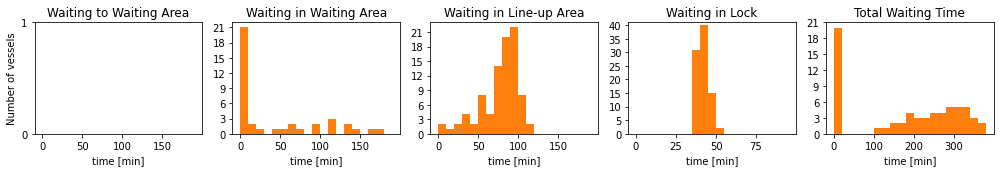

In [14]:
data= [waiting_to_waiting_area,waiting_in_waiting_area,waiting_in_lineup_area,waiting_in_lock,total_waiting_time]
xaxes = 'time [min]'
titles = ['Waiting to Waiting Area','Waiting in Waiting Area','Waiting in Line-up Area','Waiting in Lock','Total Waiting Time'] 
bins = [range(0,200,10),range(0,200,10),range(0,200,10),range(0,100,5),range(0,400,20)]

f,a = plt.subplots(1,5,figsize=(14, 2.5))
a = a.ravel()
for idx,ax in enumerate(a):
    if idx == 0:
        ax.set_ylabel('Number of vessels')
    ax.hist(data[idx], bins = bins[idx])
    ax.set_title(titles[idx])
    ax.set_xlabel(xaxes)
    ax.set_ylim(0, max(ax.hist(data[idx], bins = bins[idx])[0])+1);
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.tight_layout()

In [15]:
def calculate_distance(orig, dest):
    wgs84 = pyproj.Geod(ellps='WGS84')
    
    distance = wgs84.inv(orig[0], orig[1], 
                         dest[0], dest[1])[2]
    
    return distance

vessel_path_x = []
vessel_path_t = []

for v in range(0,len(vessels)):
    vessel_path_xt = []
    vessel_path_tt = []
    for t in range(0,len(vessels[v].log["Message"])):
        if vessels[v].route[0] == origin:   
            vessel_path_x0 = (vessels[v].log["Geometry"][0].x,vessels[v].log['Geometry'][0].y)
            vessel_path_t0 = simulation_start.timestamp()
            vessel_path_xt.append(calculate_distance(vessel_path_x0,(vessels[v].log["Geometry"][t].x,vessels[v].log['Geometry'][t].y)))
            vessel_path_tt.append(vessels[v].log["Timestamp"][t].timestamp()-vessel_path_t0)
        if vessels[v].route[0] == destination:     
            vessel_path_x0 = (vessels[v].log["Geometry"][0].x,vessels[v].log['Geometry'][0].y)
            vessel_path_t0 = simulation_start.timestamp()
            vessel_path_xt.append(calculate_distance((env.FG.nodes[destination]['geometry'].x,env.FG.nodes[destination]['geometry'].y),(env.FG.nodes[origin]['geometry'].x,env.FG.nodes[origin]['geometry'].y))-
                                  calculate_distance(vessel_path_x0,(vessels[v].log["Geometry"][t].x,vessels[v].log['Geometry'][t].y)))
            vessel_path_tt.append(vessels[v].log["Timestamp"][t].timestamp()-vessel_path_t0)
    vessel_path_x.append(vessel_path_xt)
    vessel_path_t.append(vessel_path_tt)

for v in range(0,len(vessels)):
    if vessels[v].route[0] == 'Node 1':   
        vessel_path_x0 = (vessels[v].log["Geometry"][0].x,vessels[v].log['Geometry'][0].y)
        break

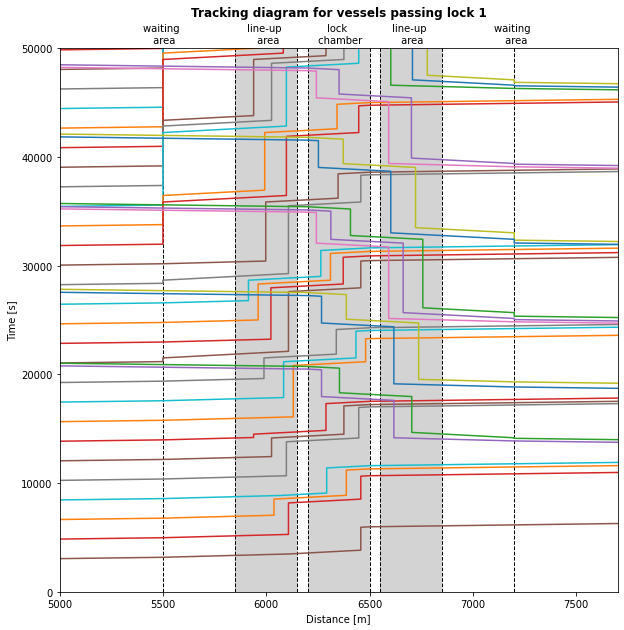

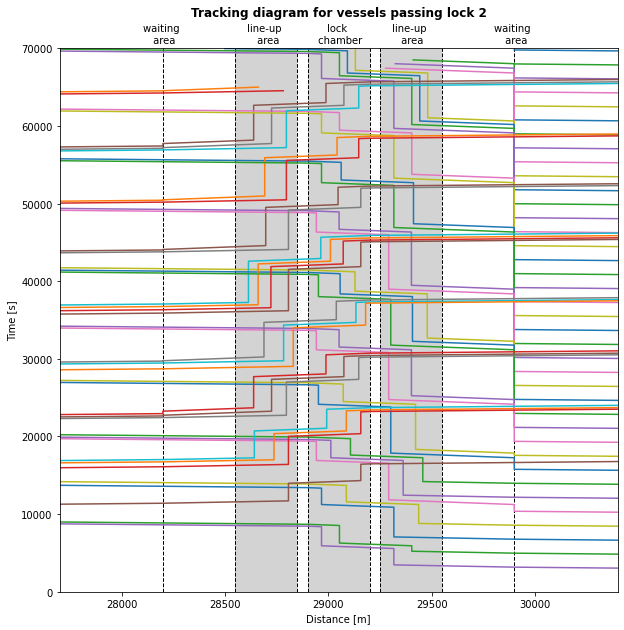

In [16]:
fig, ax = plt.subplots(figsize=(10, 10))
manual_ylim = True
nodes = ['Node 2','Node 3','Node 4','Node 5','Node 6','Node 7','Node 8','Node 9','Node 10','Node 11','Node 12','Node 13','Node 14']
ylim = 50000

plt.axvline(x=calculate_distance(vessel_path_x0,(FG.nodes[nodes[1]]['geometry'].x,FG.nodes[nodes[1]]['geometry'].y)), 
                                                 color = 'k', linestyle = '--', linewidth = 1.0)
plt.axvline(x=calculate_distance(vessel_path_x0,(FG.nodes[nodes[3]]['geometry'].x,FG.nodes[nodes[3]]['geometry'].y)), 
                                                 color = 'k', linestyle = '--', linewidth = 1.0)
plt.axvline(x=calculate_distance(vessel_path_x0,(FG.nodes[nodes[4]]['geometry'].x,FG.nodes[nodes[4]]['geometry'].y)), 
                                                 color = 'k', linestyle = '--', linewidth = 1.0)
plt.axvline(x=calculate_distance(vessel_path_x0,(FG.nodes[nodes[5]]['geometry'].x,FG.nodes[nodes[5]]['geometry'].y)), 
                                                 color = 'k', linestyle = '--', linewidth = 1.0)
plt.axvline(x=calculate_distance(vessel_path_x0,(FG.nodes[nodes[7]]['geometry'].x,FG.nodes[nodes[7]]['geometry'].y)), 
                                                 color = 'k', linestyle = '--', linewidth = 1.0)
plt.axvline(x=calculate_distance(vessel_path_x0,(FG.nodes[nodes[8]]['geometry'].x,FG.nodes[nodes[8]]['geometry'].y)), 
                                                 color = 'k', linestyle = '--', linewidth = 1.0)
plt.axvline(x=calculate_distance(vessel_path_x0,(FG.nodes[nodes[9]]['geometry'].x,FG.nodes[nodes[9]]['geometry'].y)), 
                                                 color = 'k', linestyle = '--', linewidth = 1.0)
plt.axvline(x=calculate_distance(vessel_path_x0,(FG.nodes[nodes[11]]['geometry'].x,FG.nodes[nodes[11]]['geometry'].y)), 
                                                 color = 'k', linestyle = '--', linewidth = 1.0)
for v in reversed(range(0,len(vessels))):
    plt.plot(vessel_path_x[v],vessel_path_t[v])

if manual_ylim == False:
    plt.text(calculate_distance(vessel_path_x0,(FG.nodes[nodes[6]]['geometry'].x,FG.nodes[nodes[6]]['geometry'].y)),ax.get_ylim()[1]+0.01*ax.get_ylim()[1],'lock \n chamber',horizontalalignment = 'center')
    plt.text(calculate_distance(vessel_path_x0,(FG.nodes[nodes[9]]['geometry'].x,FG.nodes[nodes[9]]['geometry'].y))-
             0.5*calculate_distance((FG.nodes[nodes[8]]['geometry'].x,FG.nodes[nodes[8]]['geometry'].y),(FG.nodes[nodes[9]]['geometry'].x,FG.nodes[nodes[9]]['geometry'].y)),ax.get_ylim()[1]+0.01*ax.get_ylim()[1],'line-up \n area',horizontalalignment = 'center')
    plt.text(calculate_distance(vessel_path_x0,(FG.nodes[nodes[3]]['geometry'].x,FG.nodes[nodes[3]]['geometry'].y))+
             0.5*calculate_distance((FG.nodes[nodes[3]]['geometry'].x,FG.nodes[nodes[3]]['geometry'].y),(FG.nodes[nodes[4]]['geometry'].x,FG.nodes[nodes[4]]['geometry'].y)),ax.get_ylim()[1]+0.01*ax.get_ylim()[1],'line-up \n area',horizontalalignment = 'center')
    plt.text(calculate_distance(vessel_path_x0,(FG.nodes[nodes[1]]['geometry'].x,FG.nodes[nodes[1]]['geometry'].y)),ax.get_ylim()[1]+0.01*ax.get_ylim()[1],'waiting \n area',horizontalalignment = 'center')
    plt.text(calculate_distance(vessel_path_x0,(FG.nodes[nodes[11]]['geometry'].x,FG.nodes[nodes[11]]['geometry'].y)),ax.get_ylim()[1]+0.01*ax.get_ylim()[1],'waiting \n area',horizontalalignment = 'center')
else:
    plt.text(calculate_distance(vessel_path_x0,(FG.nodes[nodes[6]]['geometry'].x,FG.nodes[nodes[6]]['geometry'].y)),1.01*ylim,'lock \n chamber',horizontalalignment = 'center')
    plt.text(calculate_distance(vessel_path_x0,(FG.nodes[nodes[9]]['geometry'].x,FG.nodes[nodes[9]]['geometry'].y))-
             0.5*calculate_distance((FG.nodes[nodes[8]]['geometry'].x,FG.nodes[nodes[8]]['geometry'].y),(FG.nodes[nodes[9]]['geometry'].x,FG.nodes[nodes[9]]['geometry'].y)),1.01*ylim,'line-up \n area',horizontalalignment = 'center')
    plt.text(calculate_distance(vessel_path_x0,(FG.nodes[nodes[3]]['geometry'].x,FG.nodes[nodes[3]]['geometry'].y))+
             0.5*calculate_distance((FG.nodes[nodes[3]]['geometry'].x,FG.nodes[nodes[3]]['geometry'].y),(FG.nodes[nodes[4]]['geometry'].x,FG.nodes[nodes[4]]['geometry'].y)),1.01*ylim,'line-up \n area',horizontalalignment = 'center')
    plt.text(calculate_distance(vessel_path_x0,(FG.nodes[nodes[1]]['geometry'].x,FG.nodes[nodes[1]]['geometry'].y)),1.01*ylim,'waiting \n area',horizontalalignment = 'center')
    plt.text(calculate_distance(vessel_path_x0,(FG.nodes[nodes[11]]['geometry'].x,FG.nodes[nodes[11]]['geometry'].y)),1.01*ylim,'waiting \n area',horizontalalignment = 'center')

plt.title("Tracking diagram for vessels passing lock 1", fontweight='bold', pad = 32)
plt.xlabel("Distance [m]")
plt.xlim([calculate_distance(vessel_path_x0,(FG.nodes[nodes[0]]['geometry'].x,FG.nodes[nodes[0]]['geometry'].y)),
          calculate_distance(vessel_path_x0,(FG.nodes[nodes[-1]]['geometry'].x,FG.nodes[nodes[-1]]['geometry'].y))])

if manual_ylim == False:
    plt.ylim([0,ax.get_ylim()[1]])
else:
    plt.ylim([0,ylim])
plt.ylabel("Time [s]")

plt.fill([calculate_distance(vessel_path_x0,(FG.nodes[nodes[3]]['geometry'].x,FG.nodes[nodes[3]]['geometry'].y)),
          calculate_distance(vessel_path_x0,(FG.nodes[nodes[3]]['geometry'].x,FG.nodes[nodes[3]]['geometry'].y)),
          calculate_distance(vessel_path_x0,(FG.nodes[nodes[4]]['geometry'].x,FG.nodes[nodes[4]]['geometry'].y)), 
          calculate_distance(vessel_path_x0,(FG.nodes[nodes[4]]['geometry'].x,FG.nodes[nodes[4]]['geometry'].y))],
         [0, ax.get_ylim()[1], ax.get_ylim()[1], 0],'lightgrey')

plt.fill([calculate_distance(vessel_path_x0,(FG.nodes[nodes[5]]['geometry'].x,FG.nodes[nodes[5]]['geometry'].y)),
          calculate_distance(vessel_path_x0,(FG.nodes[nodes[5]]['geometry'].x,FG.nodes[nodes[5]]['geometry'].y)),
          calculate_distance(vessel_path_x0,(FG.nodes[nodes[7]]['geometry'].x,FG.nodes[nodes[7]]['geometry'].y)), 
          calculate_distance(vessel_path_x0,(FG.nodes[nodes[7]]['geometry'].x,FG.nodes[nodes[7]]['geometry'].y))],
         [0, ax.get_ylim()[1], ax.get_ylim()[1], 0],'lightgrey')

plt.fill([calculate_distance(vessel_path_x0,(FG.nodes[nodes[8]]['geometry'].x,FG.nodes[nodes[8]]['geometry'].y)),
          calculate_distance(vessel_path_x0,(FG.nodes[nodes[8]]['geometry'].x,FG.nodes[nodes[8]]['geometry'].y)),
          calculate_distance(vessel_path_x0,(FG.nodes[nodes[9]]['geometry'].x,FG.nodes[nodes[9]]['geometry'].y)), 
          calculate_distance(vessel_path_x0,(FG.nodes[nodes[9]]['geometry'].x,FG.nodes[nodes[9]]['geometry'].y))],
         [0, ax.get_ylim()[1], ax.get_ylim()[1], 0],'lightgrey')

plt.show()

fig, ax = plt.subplots(figsize=(10, 10))
manual_ylim = True
nodes = ['Node 15','Node 16','Node 17','Node 18','Node 19','Node 20','Node 21','Node 22','Node 23','Node 24','Node 25','Node 26','Node 27']
ylim = 70000

plt.axvline(x=calculate_distance(vessel_path_x0,(FG.nodes[nodes[1]]['geometry'].x,FG.nodes[nodes[1]]['geometry'].y)), 
                                                 color = 'k', linestyle = '--', linewidth = 1.0)
plt.axvline(x=calculate_distance(vessel_path_x0,(FG.nodes[nodes[3]]['geometry'].x,FG.nodes[nodes[3]]['geometry'].y)), 
                                                 color = 'k', linestyle = '--', linewidth = 1.0)
plt.axvline(x=calculate_distance(vessel_path_x0,(FG.nodes[nodes[4]]['geometry'].x,FG.nodes[nodes[4]]['geometry'].y)), 
                                                 color = 'k', linestyle = '--', linewidth = 1.0)
plt.axvline(x=calculate_distance(vessel_path_x0,(FG.nodes[nodes[5]]['geometry'].x,FG.nodes[nodes[5]]['geometry'].y)), 
                                                 color = 'k', linestyle = '--', linewidth = 1.0)
plt.axvline(x=calculate_distance(vessel_path_x0,(FG.nodes[nodes[7]]['geometry'].x,FG.nodes[nodes[7]]['geometry'].y)), 
                                                 color = 'k', linestyle = '--', linewidth = 1.0)
plt.axvline(x=calculate_distance(vessel_path_x0,(FG.nodes[nodes[8]]['geometry'].x,FG.nodes[nodes[8]]['geometry'].y)), 
                                                 color = 'k', linestyle = '--', linewidth = 1.0)
plt.axvline(x=calculate_distance(vessel_path_x0,(FG.nodes[nodes[9]]['geometry'].x,FG.nodes[nodes[9]]['geometry'].y)), 
                                                 color = 'k', linestyle = '--', linewidth = 1.0)
plt.axvline(x=calculate_distance(vessel_path_x0,(FG.nodes[nodes[11]]['geometry'].x,FG.nodes[nodes[11]]['geometry'].y)), 
                                                 color = 'k', linestyle = '--', linewidth = 1.0)
for v in reversed(range(0,len(vessels))):
    plt.plot(vessel_path_x[v],vessel_path_t[v])

if manual_ylim == False:
    plt.text(calculate_distance(vessel_path_x0,(FG.nodes[nodes[6]]['geometry'].x,FG.nodes[nodes[6]]['geometry'].y)),ax.get_ylim()[1]+0.01*ax.get_ylim()[1],'lock \n chamber',horizontalalignment = 'center')
    plt.text(calculate_distance(vessel_path_x0,(FG.nodes[nodes[9]]['geometry'].x,FG.nodes[nodes[9]]['geometry'].y))-
             0.5*calculate_distance((FG.nodes[nodes[8]]['geometry'].x,FG.nodes[nodes[8]]['geometry'].y),(FG.nodes[nodes[9]]['geometry'].x,FG.nodes[nodes[9]]['geometry'].y)),ax.get_ylim()[1]+0.01*ax.get_ylim()[1],'line-up \n area',horizontalalignment = 'center')
    plt.text(calculate_distance(vessel_path_x0,(FG.nodes[nodes[3]]['geometry'].x,FG.nodes[nodes[3]]['geometry'].y))+
             0.5*calculate_distance((FG.nodes[nodes[3]]['geometry'].x,FG.nodes[nodes[3]]['geometry'].y),(FG.nodes[nodes[4]]['geometry'].x,FG.nodes[nodes[4]]['geometry'].y)),ax.get_ylim()[1]+0.01*ax.get_ylim()[1],'line-up \n area',horizontalalignment = 'center')
    plt.text(calculate_distance(vessel_path_x0,(FG.nodes[nodes[1]]['geometry'].x,FG.nodes[nodes[1]]['geometry'].y)),ax.get_ylim()[1]+0.01*ax.get_ylim()[1],'waiting \n area',horizontalalignment = 'center')
    plt.text(calculate_distance(vessel_path_x0,(FG.nodes[nodes[11]]['geometry'].x,FG.nodes[nodes[11]]['geometry'].y)),ax.get_ylim()[1]+0.01*ax.get_ylim()[1],'waiting \n area',horizontalalignment = 'center')
else:
    plt.text(calculate_distance(vessel_path_x0,(FG.nodes[nodes[6]]['geometry'].x,FG.nodes[nodes[6]]['geometry'].y)),1.01*ylim,'lock \n chamber',horizontalalignment = 'center')
    plt.text(calculate_distance(vessel_path_x0,(FG.nodes[nodes[9]]['geometry'].x,FG.nodes[nodes[9]]['geometry'].y))-
             0.5*calculate_distance((FG.nodes[nodes[8]]['geometry'].x,FG.nodes[nodes[8]]['geometry'].y),(FG.nodes[nodes[9]]['geometry'].x,FG.nodes[nodes[9]]['geometry'].y)),1.01*ylim,'line-up \n area',horizontalalignment = 'center')
    plt.text(calculate_distance(vessel_path_x0,(FG.nodes[nodes[3]]['geometry'].x,FG.nodes[nodes[3]]['geometry'].y))+
             0.5*calculate_distance((FG.nodes[nodes[3]]['geometry'].x,FG.nodes[nodes[3]]['geometry'].y),(FG.nodes[nodes[4]]['geometry'].x,FG.nodes[nodes[4]]['geometry'].y)),1.01*ylim,'line-up \n area',horizontalalignment = 'center')
    plt.text(calculate_distance(vessel_path_x0,(FG.nodes[nodes[1]]['geometry'].x,FG.nodes[nodes[1]]['geometry'].y)),1.01*ylim,'waiting \n area',horizontalalignment = 'center')
    plt.text(calculate_distance(vessel_path_x0,(FG.nodes[nodes[11]]['geometry'].x,FG.nodes[nodes[11]]['geometry'].y)),1.01*ylim,'waiting \n area',horizontalalignment = 'center')

plt.title("Tracking diagram for vessels passing lock 2", fontweight='bold', pad = 32)
plt.xlabel("Distance [m]")
plt.xlim([calculate_distance(vessel_path_x0,(FG.nodes[nodes[0]]['geometry'].x,FG.nodes[nodes[0]]['geometry'].y)),
          calculate_distance(vessel_path_x0,(FG.nodes[nodes[-1]]['geometry'].x,FG.nodes[nodes[-1]]['geometry'].y))])

if manual_ylim == False:
    plt.ylim([0,ax.get_ylim()[1]])
else:
    plt.ylim([0,ylim])
plt.ylabel("Time [s]")

plt.fill([calculate_distance(vessel_path_x0,(FG.nodes[nodes[3]]['geometry'].x,FG.nodes[nodes[3]]['geometry'].y)),
          calculate_distance(vessel_path_x0,(FG.nodes[nodes[3]]['geometry'].x,FG.nodes[nodes[3]]['geometry'].y)),
          calculate_distance(vessel_path_x0,(FG.nodes[nodes[4]]['geometry'].x,FG.nodes[nodes[4]]['geometry'].y)), 
          calculate_distance(vessel_path_x0,(FG.nodes[nodes[4]]['geometry'].x,FG.nodes[nodes[4]]['geometry'].y))],
         [0, ax.get_ylim()[1], ax.get_ylim()[1], 0],'lightgrey')

plt.fill([calculate_distance(vessel_path_x0,(FG.nodes[nodes[5]]['geometry'].x,FG.nodes[nodes[5]]['geometry'].y)),
          calculate_distance(vessel_path_x0,(FG.nodes[nodes[5]]['geometry'].x,FG.nodes[nodes[5]]['geometry'].y)),
          calculate_distance(vessel_path_x0,(FG.nodes[nodes[7]]['geometry'].x,FG.nodes[nodes[7]]['geometry'].y)), 
          calculate_distance(vessel_path_x0,(FG.nodes[nodes[7]]['geometry'].x,FG.nodes[nodes[7]]['geometry'].y))],
         [0, ax.get_ylim()[1], ax.get_ylim()[1], 0],'lightgrey')

plt.fill([calculate_distance(vessel_path_x0,(FG.nodes[nodes[8]]['geometry'].x,FG.nodes[nodes[8]]['geometry'].y)),
          calculate_distance(vessel_path_x0,(FG.nodes[nodes[8]]['geometry'].x,FG.nodes[nodes[8]]['geometry'].y)),
          calculate_distance(vessel_path_x0,(FG.nodes[nodes[9]]['geometry'].x,FG.nodes[nodes[9]]['geometry'].y)), 
          calculate_distance(vessel_path_x0,(FG.nodes[nodes[9]]['geometry'].x,FG.nodes[nodes[9]]['geometry'].y))],
         [0, ax.get_ylim()[1], ax.get_ylim()[1], 0],'lightgrey')

plt.show()

In [17]:
df = pd.DataFrame.from_dict(lock_1_1.log)
df[0:60]

,Message,Timestamp,Value,Geometry
0,Lock doors closing start,2021-07-23 11:04:16.750000,1,Node 7
1,Lock doors closing stop,2021-07-23 11:14:16.750000,1,Node 7
2,Lock chamber converting start,2021-07-23 11:14:16.750000,1,Node 7
3,Lock chamber converting stop,2021-07-23 11:29:25.423799,1,Node 9
4,Lock doors opening start,2021-07-23 11:29:25.423799,1,Node 9
5,Lock doors opening stop,2021-07-23 11:39:25.423799,1,Node 9
6,Lock doors closing start,2021-07-23 11:41:35.423799,0,Node 9
7,Lock doors closing stop,2021-07-23 11:51:35.423799,0,Node 9
8,Lock chamber converting start,2021-07-23 11:51:35.423799,0,Node 9
9,Lock chamber converting stop,2021-07-23 12:06:44.097599,0,Node 7


In [18]:
door_open_time_doors_1 = []
door_open_time_doors_2 = []
end_time = []
nodes = ['Node 2','Node 3','Node 4','Node 5','Node 6','Node 7','Node 8','Node 9','Node 10','Node 11','Node 12','Node 13','Node 14']

for v in range(0,len(vessels)):
    end_time.append(vessels[v].log["Timestamp"][-1].timestamp())
end_of_simulation = max(end_time)

for l in range(0,len(env.FG.nodes[nodes[6]]['Lock'])):
    for t in range(0,len(env.FG.nodes[nodes[6]]['Lock'][l].log["Message"])-1):
        if env.FG.nodes[nodes[6]]['Lock'][l].log["Message"][t] == "Lock doors closing stop" and env.FG.nodes[nodes[6]]['Lock'][l].log["Geometry"][t] == nodes[5]:
            for t2 in reversed(range(0,t)):
                if env.FG.nodes[nodes[6]]['Lock'][l].log["Message"][t2] == "Lock doors opening start":
                    door_open_time_doors_1.append(env.FG.nodes[nodes[6]]['Lock'][l].log["Timestamp"][t].timestamp()/60-
                                                  env.FG.nodes[nodes[6]]['Lock'][l].log["Timestamp"][t2].timestamp()/60)
                    break
            else:
                door_open_time_doors_1.append(env.FG.nodes[nodes[6]]['Lock'][l].log["Timestamp"][t].timestamp()/60-
                                              simulation_start.timestamp()/60)
        elif env.FG.nodes[nodes[6]]['Lock'][l].log["Message"][t] == "Lock doors closing stop" and env.FG.nodes[nodes[6]]['Lock'][l].log["Geometry"][t] == nodes[7]:
            for t2 in reversed(range(0,t)):
                if env.FG.nodes[nodes[6]]['Lock'][l].log["Message"][t2] == "Lock doors opening start":
                    door_open_time_doors_2.append(env.FG.nodes[nodes[6]]['Lock'][l].log["Timestamp"][t].timestamp()/60-
                                                  env.FG.nodes[nodes[6]]['Lock'][l].log["Timestamp"][t2].timestamp()/60)
                    break
            else:
                door_open_time_doors_2.append(env.FG.nodes[nodes[6]]['Lock'][l].log["Timestamp"][t].timestamp()/60-
                                              simulation_start.timestamp()/60)

for l in range(0,len(env.FG.nodes[nodes[6]]['Lock'])):
    for t in reversed(range(0,len(env.FG.nodes[nodes[6]]['Lock'][l].log["Message"]))):
        if env.FG.nodes[nodes[6]]['Lock'][l].log["Message"][t] == "Lock doors opening stop" and env.FG.nodes[nodes[6]]['Lock'][l].log["Geometry"][t] == nodes[5]:          
            for t2 in range(t,len(env.FG.nodes[nodes[6]]['Lock'][l].log["Message"])):
                if env.FG.nodes[nodes[6]]['Lock'][l].log["Message"][t2] == "Lock doors closing stop":
                    pass
            else:
                door_open_time_doors_1.append(end_of_simulation/60-
                                              env.FG.nodes[nodes[6]]['Lock'][l].log["Timestamp"][t].timestamp()/60)
                break


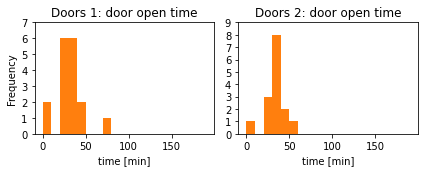

In [19]:
data= [door_open_time_doors_1,door_open_time_doors_2]
xaxes = 'time [min]'
titles = ['Doors 1: door open time','Doors 2: door open time'] 
bins = [range(0,200,10),range(0,200,10)]

f,a = plt.subplots(1,2,figsize=(6, 2.5))
a = a.ravel()
for idx,ax in enumerate(a):
    if idx == 0:
        ax.set_ylabel('Frequency')
    ax.hist(data[idx], bins = bins[idx])
    ax.set_title(titles[idx])
    ax.set_xlabel(xaxes)
    ax.set_ylim(0, max(ax.hist(data[idx], bins = bins[idx])[0])+1);
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.tight_layout()

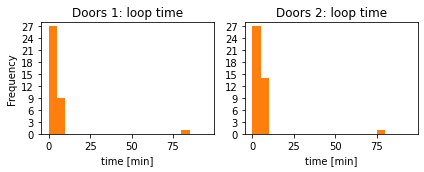

In [20]:
data= [loop_time_doors1,loop_time_doors2]
xaxes = 'time [min]'
titles = ['Doors 1: loop time','Doors 2: loop time'] 
bins = [range(0,100,5),range(0,100,5)]

f,a = plt.subplots(1,2,figsize=(6, 2.5))
a = a.ravel()
for idx,ax in enumerate(a):
    if idx == 0:
        ax.set_ylabel('Frequency')
    ax.hist(data[idx], bins = bins[idx])
    ax.set_title(titles[idx])
    ax.set_xlabel(xaxes)
    ax.set_ylim(0, max(ax.hist(data[idx], bins = bins[idx])[0])+1);
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.tight_layout()

In [21]:
for v in vessels:
    print(v.id,v.route[0],v.L)

0b8cc489-eb8c-11eb-a340-18cc18c93a64 Node 1 85.0
0b8d8b3f-eb8c-11eb-bfb8-18cc18c93a64 Node 28 135.0
0b904886-eb8c-11eb-a29f-18cc18c93a64 Node 1 85.0
0b90bd68-eb8c-11eb-9e7c-18cc18c93a64 Node 28 38.5
0b92def2-eb8c-11eb-b71a-18cc18c93a64 Node 1 55.0
0b935572-eb8c-11eb-a8a1-18cc18c93a64 Node 28 135.0
0b963eff-eb8c-11eb-bb40-18cc18c93a64 Node 1 135.0
0b96dd44-eb8c-11eb-af70-18cc18c93a64 Node 28 105.0
0b9b23ab-eb8c-11eb-b1be-18cc18c93a64 Node 1 105.0
0b9b967d-eb8c-11eb-b086-18cc18c93a64 Node 28 85.0
0b9d446f-eb8c-11eb-82bd-18cc18c93a64 Node 1 38.5
0b9d984f-eb8c-11eb-81fc-18cc18c93a64 Node 28 55.0
0ba27b34-eb8c-11eb-913e-18cc18c93a64 Node 1 135.0
0ba2f8e8-eb8c-11eb-ae01-18cc18c93a64 Node 28 135.0
0ba7d7ff-eb8c-11eb-98ce-18cc18c93a64 Node 1 38.5
0ba841a4-eb8c-11eb-baf3-18cc18c93a64 Node 28 105.0
0baa43fa-eb8c-11eb-ae99-18cc18c93a64 Node 1 55.0
0baacbcc-eb8c-11eb-9c74-18cc18c93a64 Node 28 135.0
0bb2aeff-eb8c-11eb-8895-18cc18c93a64 Node 1 135.0
0bb2fc85-eb8c-11eb-863c-18cc18c93a64 Node 28 85.0


In [22]:
len(vessels)

76